In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [2]:
raw = pd.read_csv('./data/wine_vector_2.csv')
review = raw.copy(deep=True).drop(columns = ['Unnamed: 0'])
review.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,region
0,0,355,0.0,2,3.0,California,Napa Valley,Napa,0,0,0
1,1,318,1.0,2,2.0,Northern Spain,Toro,NaN,1,1,1
2,0,280,2.0,2,1.0,California,Knights Valley,Sonoma,2,2,2
3,0,386,3.0,2,1.0,Oregon,Willamette Valley,Willamette Valley,3,3,3
4,2,376,4.0,2,1.0,Provence,Bandol,NaN,4,4,4


In [3]:
# region = province + region_1 + region_2
review = review.drop(['province', 'region_1', 'region_2'], axis=1)
review.head()

,country,description,designation,points,price,variety,winery,region
0,0,355,0.0,2,3.0,0,0,0
1,1,318,1.0,2,2.0,1,1,1
2,0,280,2.0,2,1.0,2,2,2
3,0,386,3.0,2,1.0,3,3,3
4,2,376,4.0,2,1.0,4,4,4


In [4]:
metrics = list(review.columns)
metrics.remove('points')
metrics

['country',
 'description',
 'designation',
 'price',
 'variety',
 'winery',
 'region']

In [5]:
# standardize data
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data, axis=0))
review[metrics] = standardize(review[metrics])
review.head()

,country,description,designation,points,price,variety,winery,region
0,-0.680918,1.656540,-0.844725,2,4.943627,-0.569715,-1.307175,-0.825488
1,-0.465540,1.121827,-0.844611,2,2.536439,-0.558069,-1.306907,-0.822071
2,-0.680918,0.572663,-0.844496,2,0.129251,-0.546423,-1.306638,-0.818653
3,-0.680918,2.104542,-0.844382,2,0.129251,-0.534776,-1.306370,-0.815235
4,-0.250163,1.960025,-0.844268,2,0.129251,-0.523130,-1.306102,-0.811817


In [6]:
features = review[metrics]
label = review['points']

smt = SMOTE(random_state=20)
    
X_train, X_test, Y_train, Y_test = train_test_split(features, label, 
                                                    test_size=0.20, 
                                                    random_state=0)
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print('train/test set:', len(X_train), len(X_test))

train/test set: 266180 30186


In [7]:
forest = RandomForestClassifier(n_estimators=43, 
                                max_depth=30,
                                criterion='entropy')
print('CVS:', np.mean(cross_val_score(forest, X_train, Y_train, cv=10)))

CVS: 0.893295097625052


ACC: 0.7970251109785994
Confusion Matrix:
 [[   65    29     4     0     0]
 [   29  1810   453    98     3]
 [    9   561  7555  1465   121]
 [    3   127  1368 10933   935]
 [    0     8   128   786  3696]]
Overall Report:
               precision    recall  f1-score   support

           1       0.61      0.66      0.64        98
           2       0.71      0.76      0.73      2393
           3       0.79      0.78      0.79      9711
           4       0.82      0.82      0.82     13366
           5       0.78      0.80      0.79      4618

   micro avg       0.80      0.80      0.80     30186
   macro avg       0.74      0.76      0.75     30186
weighted avg       0.80      0.80      0.80     30186



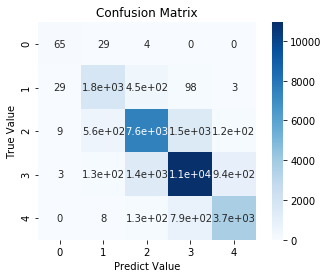

In [8]:
forest.fit(X_train, Y_train)
Y_test_predict = forest.predict(X_test)
print('ACC:', accuracy_score(Y_test, Y_test_predict))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_test_predict))
mat = confusion_matrix(Y_test, Y_test_predict)
sns.heatmap(mat, square=True, annot=True, cmap='Blues')
plt.xlabel('Predict Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
print('Overall Report:\n', classification_report(Y_test, Y_test_predict))